In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Loading the datsets
customers_df= pd.read_csv("C:/Users/Rahul Thakur/Downloads/Customers.csv")
products_df= pd.read_csv("C:/Users/Rahul Thakur/Downloads/Products.csv")
transactions_df = pd.read_csv("C:/Users/Rahul Thakur/Downloads/Transactions.csv")

In [3]:
# Aggregate transaction data per customer
customer_transactions = transactions_df.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    recent_transaction=('TransactionDate', 'max')  # Most recent transaction date
).reset_index()


In [4]:
customer_profile = pd.merge(customers_df, customer_transactions, on='CustomerID')

In [5]:
# Convert the 'recent_transaction' date to recency (days since last purchase)
customer_profile['recent_transaction'] = pd.to_datetime(customer_profile['recent_transaction'])
customer_profile['days_since_last_purchase'] = (pd.to_datetime('today') - customer_profile['recent_transaction']).dt.days

In [6]:
# Drop unnecessary columns (keeping only features for clustering)
customer_profile = customer_profile.drop(columns=['CustomerName', 'Region', 'SignupDate', 'recent_transaction'])

In [8]:
# Normalize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile.drop(columns=['CustomerID']))

In [9]:
# Apply K-Means Clustering
# Let's try with 5 clusters (you can adjust this number as needed)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [10]:
# Clustering Metrics
# Davies-Bouldin Index and Silhouette Score to evaluate clustering
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)


In [11]:
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 1.1319699581653795
Silhouette Score: 0.26295930975112125


In [13]:
# Add Cluster Labels to the Customer Profile
customer_profile['Cluster'] = kmeans.labels_

In [14]:
# Visualize the Clusters
# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

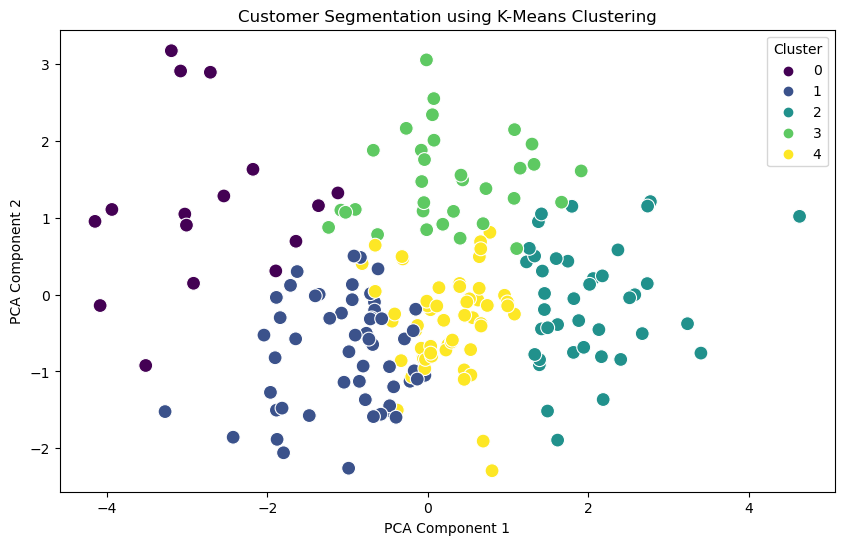

In [15]:
# Plot the clusters in a 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_profile['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [16]:
# Save the results to CSV
customer_profile.to_csv('Rahul_Yaduvanshi_Clustering.csv', index=False)